In [1]:
%matplotlib inline
import ciw
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tqdm

In [2]:
lmbda = 1 / 5.5
N = 10 ** 6
arrival_times = [random.expovariate(lmbda) for _ in range(N)]

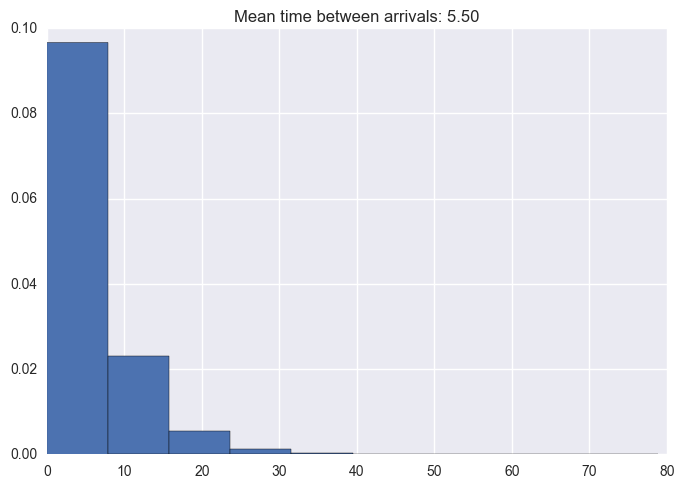

In [3]:
plt.hist(arrival_times, normed=True)
plt.title("Mean time between arrivals: {:.2f}".format(np.mean(arrival_times)))
plt.savefig("variability-and-queues.png")

There is a formula for the expected wait in a single server queue:

$$
\frac{\lambda / \mu}{\mu - \lambda}
$$

In [ ]:
def expected_wait(lmbda, mu):
    return lmbda / mu / (mu - lmbda)

In [ ]:
expected_wait(5.5, 11)

Simulating this:

In [ ]:
parameters = {'Arrival_distributions': {'Class 0': [['Exponential', 5.5]]},
              'Service_distributions': {'Class 0': [['Exponential', 11]]},
              'Transition_matrices': {'Class 0': [[0.0]]},
              'Number_of_servers': [1]}

In [ ]:
def iteration(parameters, maxtime=250, warmup=50):
    """
    Run a single iteration of the simulation and
    return the times spent waiting for service
    as well as the service times
    """
    N = ciw.create_network(parameters)
    Q = ciw.Simulation(N)
    Q.simulate_until_max_time(maxtime)
    records = [r for r in  Q.get_all_records() if r.arrival_date > warmup]
    waits = [r.waiting_time for r in records]
    return waits

def trials(parameters, repetitions=20, maxtime=400, warmup=50):
    """Repeat out simulation over a number of trials"""
    waits = []
    for seed in tqdm.trange(repetitions):  # tqdm gives us a nice progress bar
        ciw.seed(seed)
        wait = iteration(parameters, maxtime=maxtime, warmup=warmup)
        waits.extend(wait)
    return waits

In [ ]:
waits = trials(parameters)

In [ ]:
np.mean(waits)